# Introduction: 

## we are having three csv files. 
## 1-Contains movie names and genres
## 2-Contains tags
## 3-Ratings of the movies

### Now we are going to analyze the datasets and need the visualize the analysis results

In [1]:
# import the requried libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data form the files

ratings=pd.read_csv(r"D:\Temp\Data Science & Artificial Intelligence\Completed\Week-3\Class-17 on 08-02-2024 on Thrusday\datasets\archive (1)\rating.csv")
tags=pd.read_csv(r"D:\Temp\Data Science & Artificial Intelligence\Completed\Week-3\Class-17 on 08-02-2024 on Thrusday\datasets\archive (1)\tag.csv")
movies=pd.read_csv(r"D:\Temp\Data Science & Artificial Intelligence\Completed\Week-3\Class-17 on 08-02-2024 on Thrusday\datasets\archive (1)\movie.csv")

In [3]:
# preview individual dataframes

In [4]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [5]:
tags

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


In [7]:
# viewing the shapes of the dataframes

print('shape of movies dataframe is ',movies.shape)
print('shape of tags dataframe is ',tags.shape)
print('shape of ratings dataframe is ',ratings.shape)

shape of movies dataframe is  (27278, 3)
shape of tags dataframe is  (465564, 4)
shape of ratings dataframe is  (20000263, 4)


In [8]:
# first we will go with setting movies dataframe

movies.shape

(27278, 3)

In [9]:
movies.info()# total informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


In [10]:
#checking null values
movies.isnull().sum()
# there is no null values

movieId    0
title      0
genres     0
dtype: int64

In [11]:
movies.columns# attributes

Index(['movieId', 'title', 'genres'], dtype='object')

In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
# we found that this dataframe contains 2-categorical attributes[title, genres] and 1-numerical attribute[movieId]

In [14]:
# we found all the movie titles contains it's released year. So we will extract the year from the tilte to form a new attribute as Year

In [15]:
movies['title'].str.extract(r'\((\d{4})\)')# it will extract the digits from the text.

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
27273,2007
27274,2002
27275,2014
27276,2001


In [16]:
movies['Year']=movies['title'].str.extract(r'\((\d{4})\)')# it will extract the digits from the text and form a new attribute.

In [17]:
movies.columns

Index(['movieId', 'title', 'genres', 'Year'], dtype='object')

In [18]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [19]:
# now we created new attribute Year. So we need to remove the years in the title.

In [20]:
movies.title.str.replace(r'[\(\d+\)]','',regex=True)

0                          Toy Story 
1                            Jumanji 
2                   Grumpier Old Men 
3                  Waiting to Exhale 
4        Father of the Bride Part II 
                     ...             
27273          Kein Bund für's Leben 
27274         Feuer, Eis & Dosenbier 
27275                    The Pirates 
27276                   Rentun Ruusu 
27277                      Innocence 
Name: title, Length: 27278, dtype: object

In [21]:
movies.title=movies.title.str.replace(r'\(\d+\)','',regex=True)# removed the year in the title

In [22]:
# now we will set the genres

In [23]:
movies.genres.unique()

array(['Adventure|Animation|Children|Comedy|Fantasy',
       'Adventure|Children|Fantasy', 'Comedy|Romance', ...,
       'Action|Adventure|Animation|Fantasy|Horror',
       'Animation|Children|Comedy|Fantasy|Sci-Fi',
       'Animation|Children|Comedy|Western'], dtype=object)

In [24]:
movies.genres.nunique()

1342

In [25]:
# now we will try get the count of genres.

In [26]:
movies.genres.str.split('|').tolist()# it will split the multiple genres with | separator ant make them in the form of lists

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy'],
 ['Action', 'Crime', 'Thriller'],
 ['Comedy', 'Romance'],
 ['Adventure', 'Children'],
 ['Action'],
 ['Action', 'Adventure', 'Thriller'],
 ['Comedy', 'Drama', 'Romance'],
 ['Comedy', 'Horror'],
 ['Adventure', 'Animation', 'Children'],
 ['Drama'],
 ['Action', 'Adventure', 'Romance'],
 ['Crime', 'Drama'],
 ['Drama', 'Romance'],
 ['Comedy'],
 ['Comedy'],
 ['Action', 'Comedy', 'Crime', 'Drama', 'Thriller'],
 ['Comedy', 'Crime', 'Thriller'],
 ['Crime', 'Drama', 'Horror', 'Mystery', 'Thriller'],
 ['Action', 'Crime', 'Thriller'],
 ['Drama', 'Sci-Fi'],
 ['Drama', 'Romance'],
 ['Drama'],
 ['Children', 'Drama'],
 ['Drama', 'Romance'],
 ['Adventure', 'Drama', 'Fantasy', 'Mystery', 'Sci-Fi'],
 ['Crime', 'Drama'],
 ['Drama'],
 ['Mystery', 'Sci-Fi', 'Thriller'],
 ['Adventure', 'Romance', 'IMAX'],
 ['Children', 'Drama'],
 ['Drama', '

In [27]:
gernes_list=movies.genres.str.split('|').tolist()# assigning that list to a varaible

In [28]:
sum(gernes_list,[])# it will combine all the individual lists in that gernes_list

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Adventure',
 'Romance',
 'IMAX',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Crime'

In [29]:
len(sum(gernes_list,[]))

54406

In [30]:
# removing duplicates 

set(sum(gernes_list,[]))# set will not accept the duplicates

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [31]:
len(set(sum(gernes_list,[])))# we are having 20 unique gerne values

20

In [32]:
movies.head()

,movieId,title,genres,Year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [33]:
# here for a single movies there are multiple gernes, so we can add dummy variables.

In [34]:
gernes_dummies=movies.genres.str.get_dummies(sep='|')
gernes_dummies# created a dataframe of dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27274,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27275,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27276,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
movies=pd.concat([movies,gernes_dummies],axis=1)# merged two dataframes
movies

,movieId,title,genres,Year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,Comedy,2007,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27274,131256,"Feuer, Eis & Dosenbier",Comedy,2002,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27275,131258,The Pirates,Adventure,2014,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27276,131260,Rentun Ruusu,(no genres listed),2001,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# now we made our movies dataframe somemore better for future analysis.

In [37]:
# let's set the ratings dataframe now

In [38]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [39]:
ratings[ratings.movieId==1]['rating'].mean()# getting the average rating of a movie

3.921239561324077

### we are getting the rating of the individual movies as     rating=(sum of the ratings of a movie/no of rows of a movie) and rounding it.


In [40]:
ratings_frame=ratings[['movieId','rating']].groupby('movieId',as_index=False).mean().round(1)
ratings_frame

,movieId,rating
0,1,3.9
1,2,3.2
2,3,3.2
3,4,2.9
4,5,3.1
...,...,...
26739,131254,4.0
26740,131256,4.0
26741,131258,2.5
26742,131260,3.0


In [41]:
# now we will add this ratings to the movies dataframe by using merge()

In [42]:
movies=movies.merge(ratings_frame,on='movieId',how='left') # merging the two dataframes

In [43]:
movies.head()

,movieId,title,genres,Year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,3.9
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,3.2
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,3.2
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,2.9
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.1


In [44]:
# now we added the all the ratings of their respective movies.

In [45]:
ratings.head() 

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [46]:
# we cleared ratings.

In [47]:
# Now we will go with tags dataframe

In [48]:
tags.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [49]:
# we found for a single movie there are multiple tags.

In [50]:
# we will make the list of tags of individual movies now

In [51]:
moive_tags=tags.groupby('movieId')['tag'].apply(list).reset_index()
moive_tags

,movieId,tag
0,1,"[Watched, computer animation, Disney animated ..."
1,2,"[time travel, adapted from:book, board game, c..."
2,3,"[old people that is actually funny, sequel fev..."
3,4,"[chick flick, revenge, characters, chick flick..."
4,5,"[Diane Keaton, family, sequel, Steve Martin, w..."
...,...,...
19540,131054,[dinosaurs]
19541,131082,"[documentary, Yoshitomo Nara]"
19542,131164,[Vietnam War]
19543,131170,[alternate reality]


In [52]:
# we add the tags to the movies dataframe.

In [53]:
movies=movies.merge(moive_tags,on='movieId',how='left')

In [54]:
movies.head()

,movieId,title,genres,Year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating,tag
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,3.9,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,3.2,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,3.2,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,2.9,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,3.1,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [55]:
# we successfully added the tags in the movies dataframe

In [56]:
movies.rename(columns={'tag':'tags'},inplace=True)# renaming the column name

In [57]:
# i want to re-arange the coumns

In [58]:
movies.columns

Index(['movieId', 'title', 'genres', 'Year', '(no genres listed)', 'Action',
       'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'rating', 'tags'],
      dtype='object')

In [59]:
movies=movies[['movieId', 'title', 'Year', 'rating', 'genres', '(no genres listed)', 'Action','Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery','Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'tags']]

In [60]:
movies.head()

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [61]:
# we successfully re-aranged the columns

In [62]:
movies.shape

(27278, 26)

In [63]:
movies.info()# total information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             27278 non-null  int64  
 1   title               27278 non-null  object 
 2   Year                27256 non-null  object 
 3   rating              26744 non-null  float64
 4   genres              27278 non-null  object 
 5   (no genres listed)  27278 non-null  int64  
 6   Action              27278 non-null  int64  
 7   Adventure           27278 non-null  int64  
 8   Animation           27278 non-null  int64  
 9   Children            27278 non-null  int64  
 10  Comedy              27278 non-null  int64  
 11  Crime               27278 non-null  int64  
 12  Documentary         27278 non-null  int64  
 13  Drama               27278 non-null  int64  
 14  Fantasy             27278 non-null  int64  
 15  Film-Noir           27278 non-null  int64  
 16  Horr

In [64]:
movies.dtypes# data types

movieId                 int64
title                  object
Year                   object
rating                float64
genres                 object
(no genres listed)      int64
Action                  int64
Adventure               int64
Animation               int64
Children                int64
Comedy                  int64
Crime                   int64
Documentary             int64
Drama                   int64
Fantasy                 int64
Film-Noir               int64
Horror                  int64
IMAX                    int64
Musical                 int64
Mystery                 int64
Romance                 int64
Sci-Fi                  int64
Thriller                int64
War                     int64
Western                 int64
tags                   object
dtype: object

In [65]:
movies.isnull().sum()

movieId                  0
title                    0
Year                    22
rating                 534
genres                   0
(no genres listed)       0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
IMAX                     0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
tags                  7733
dtype: int64

In [66]:
# we have missing values in the year attribute. 
# so we will fill the years with the year of the first review of that respwctie movie.

In [67]:
movies[movies.Year.isna()]['movieId'].tolist() # this the list of movies with missing years

[40697,
 79607,
 87442,
 107434,
 108548,
 108583,
 112406,
 113190,
 115133,
 115685,
 125571,
 125632,
 125958,
 126438,
 126929,
 127005,
 128612,
 128734,
 129651,
 129705,
 129887,
 130454]

In [68]:
missing_year_movies=movies[movies.Year.isna()]['movieId'].tolist()

In [69]:
# now i'm filling them with their first rating years

In [70]:
for i in missing_year_movies:
    temp=ratings.loc[ratings.movieId==i,'timestamp'].sort_values().head(1)
    temp=pd.to_datetime(temp.iloc[0]).year
    movies.loc[movies.movieId==i,'Year']=temp

In [71]:
movies.isnull().sum()

movieId                  0
title                    0
Year                     0
rating                 534
genres                   0
(no genres listed)       0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
IMAX                     0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
tags                  7733
dtype: int64

In [72]:
# we fill the missing values of year attribute.

In [73]:
# now to try to fill the missing values in rating in movies dataframe

In [74]:
movies[movies.rating.isna()][['movieId','rating','genres']]# these are the details of missed rating movies

,movieId,rating,genres
8555,26018,NaN,Crime|Film-Noir|Mystery|Thriller
8933,26580,NaN,Action|Drama|Thriller
9249,27249,NaN,Animation|Drama|Musical
9315,27396,NaN,Drama
9770,31797,NaN,Drama
...,...,...,...
26818,128886,NaN,Comedy|Drama
26872,129201,NaN,Mystery
26933,129443,NaN,Drama
27004,129820,NaN,Children|Drama


In [75]:
missing_rating_movies=movies[movies.rating.isna()][['movieId','rating','genres']]

In [76]:
# we fill these missing values with the average rating of the similar gerne movies.

In [77]:
for i in range(len(missing_rating_movies)):
    id=missing_rating_movies[['movieId','genres']].iloc[i].movieId
    ger=missing_rating_movies[['movieId','genres']].iloc[i].genres.split(sep='|')[0]
    missing_rating_movies.loc[missing_rating_movies.movieId==id,'rating']=movies[movies.genres.str.split('|').str[0]==ger]['rating'].mean()

In [78]:
missing_rating_movies.rating=missing_rating_movies.rating.round(1)

In [79]:
movies=movies.merge(missing_rating_movies[['movieId','rating']],on='movieId',how='outer')
movies

,movieId,title,Year,rating_x,genres,(no genres listed),Action,Adventure,Animation,Children,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags,rating_y
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ...",NaN
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c...",NaN
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev...",NaN
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick...",NaN
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,4.0,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
27274,131256,"Feuer, Eis & Dosenbier",2002,4.0,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN
27275,131258,The Pirates,2014,2.5,Adventure,0,0,1,0,0,...,0,0,0,0,0,0,0,0,"[bandits, Korea, mutiny, pirates, whale]",NaN
27276,131260,Rentun Ruusu,2001,3.0,(no genres listed),1,0,0,0,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [80]:
movies['rating_x'].fillna(movies[movies.rating_x.isna()].rating_y,inplace=True)

C:\Users\laasa\AppData\Local\Temp\ipykernel_7520\2000720275.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  movies['rating_x'].fillna(movies[movies.rating_x.isna()].rating_y,inplace=True)


In [81]:
movies.drop('rating_y',axis=1,inplace=True)

In [82]:
movies.rename(columns={'rating_x':'rating'},inplace=True)

In [83]:
movies.isnull().sum()

movieId                  0
title                    0
Year                     0
rating                   0
genres                   0
(no genres listed)       0
Action                   0
Adventure                0
Animation                0
Children                 0
Comedy                   0
Crime                    0
Documentary              0
Drama                    0
Fantasy                  0
Film-Noir                0
Horror                   0
IMAX                     0
Musical                  0
Mystery                  0
Romance                  0
Sci-Fi                   0
Thriller                 0
War                      0
Western                  0
tags                  7733
dtype: int64

In [84]:
# now our dataframe is free of missing values.
# tags attribute has no preference, so leave it.

In [85]:
# this is our perfect movies dataframe.
movies

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27273,131254,Kein Bund für's Leben,2007,4.0,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27274,131256,"Feuer, Eis & Dosenbier",2002,4.0,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
27275,131258,The Pirates,2014,2.5,Adventure,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[bandits, Korea, mutiny, pirates, whale]"
27276,131260,Rentun Ruusu,2001,3.0,(no genres listed),1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [86]:
movies.describe()

,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,...,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000,27278.000000
mean,59855.480570,3.134009,0.009018,0.129042,0.085380,0.037649,0.041755,0.306987,0.107743,0.090586,...,0.012098,0.095718,0.007185,0.037979,0.055503,0.151294,0.063898,0.153164,0.043772,0.024782
std,44429.314697,0.658372,0.094537,0.335252,0.279452,0.190350,0.200033,0.461253,0.310061,0.287024,...,0.109324,0.294210,0.084462,0.191150,0.228963,0.358342,0.244575,0.360152,0.204590,0.155463
min,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6931.250000,2.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68068.000000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,100293.250000,3.600000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131262.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
# univariate analysis

In [88]:
movies.Year.unique()# these are the unique years

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', 2013, '1903',
       '2007', '2008', '2009', '1912', '2010', 2010, '1913', '2011',
       '1898', '1899', 2011, '1894', '2012', '1909', '1910', '1901',
       '1893

In [89]:
# we found there are some duplicates, it's beacause of some factors like datatypes, spaces...etc

In [90]:
movies.Year=movies[['Year']].astype(str)

In [91]:
movies.Year.sort_values().unique()

array(['1891', '1893', '1894', '1895', '1896', '1898', '1899', '1900',
       '1901', '1902', '1903', '1905', '1909', '1910', '1912', '1913',
       '1914', '1915', '1916', '1917', '1918', '1919', '1920', '1921',
       '1922', '1923', '1924', '1925', '1926', '1927', '1928', '1929',
       '1930', '1931', '1932', '1933', '1934', '1935', '1936', '1937',
       '1938', '1939', '1940', '1941', '1942', '1943', '1944', '1945',
       '1946', '1947', '1948', '1949', '1950', '1951', '1952', '1953',
       '1954', '1955', '1956', '1957', '1958', '1959', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
      

In [92]:
movies.Year.nunique() # we are having 118 years movies data in our movies dataframe

118

In [93]:
year_counts=movies[['Year']].groupby('Year',as_index=False).size()

In [94]:
year_counts

,Year,size
0,1891,1
1,1893,1
2,1894,2
3,1895,2
4,1896,2
...,...,...
113,2011,1017
114,2012,1022
115,2013,1013
116,2014,746


In [95]:
plt.rcParams['figure.figsize']=(6,6)

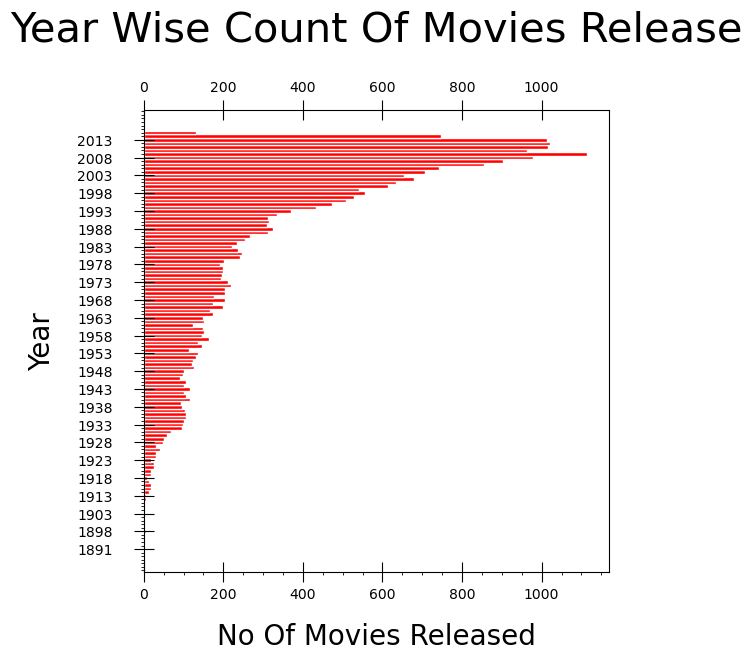

In [96]:
plt.barh(data=year_counts,y='Year',width='size',height=1,ec='white',fc='red')
plt.yticks(rotation=0,ticks=range(0,118,5))
plt.tick_params(top=True,direction='inout',length=15,pad=15,labeltop=True,axis='y')
plt.tick_params(top=True,direction='inout',length=15,labeltop=True,axis='x')
plt.grid(which='minor',axis='y',alpha=0)
plt.minorticks_on()
plt.title('Year Wise Count Of Movies Release',pad=50,size=30)
plt.xlabel('No Of Movies Released',size=20,labelpad=15)
plt.ylabel('Year',size=20,labelpad=15)
plt.show()

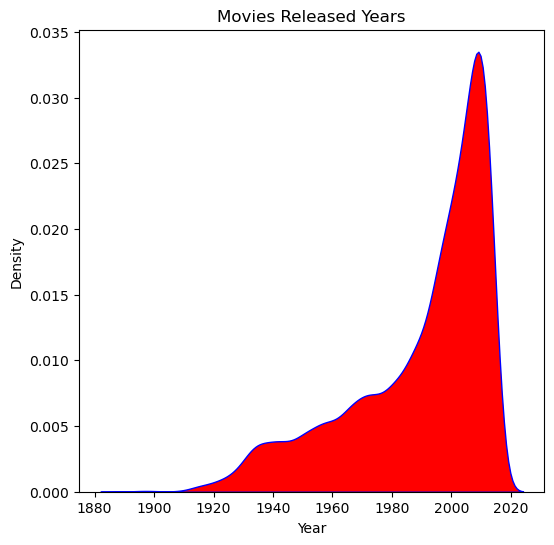

In [97]:
sns.kdeplot(movies.Year.astype(int),alpha=1,fill=True,fc='red',ec='blue')
plt.title('Movies Released Years')
plt.show()

In [98]:
# according to the above figures, more movies are released in 2009.
# From 1995, no of movies released increased due to many factors like technology grow, movies awearness in people...etc

In [99]:
movies.head()

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [100]:
#rating

In [101]:
movies.rating

0        3.9
1        3.2
2        3.2
3        2.9
4        3.1
        ... 
27273    4.0
27274    4.0
27275    2.5
27276    3.0
27277    4.0
Name: rating, Length: 27278, dtype: float64

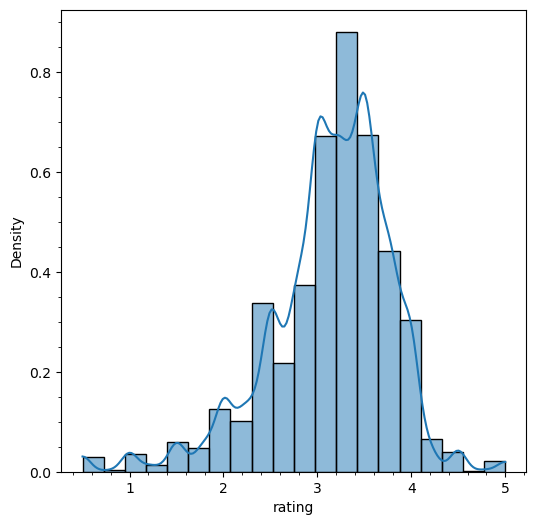

In [102]:
sns.histplot(movies.rating,bins=20,stat='density',kde=True)
plt.minorticks_on()
plt.show()

In [103]:
# According to the above figure, amoung the movies more movies got 3.6 to 3.8 ratings.
# only few got 4.8 to 5 ratings.

In [104]:
movies.head()

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [105]:
# Genres

In [106]:
genres_list=list(set(sum(movies.genres.str.split('|'),[]))) # we have these genres
genres_list

['Thriller',
 'Musical',
 'IMAX',
 'Crime',
 'Children',
 'Horror',
 '(no genres listed)',
 'Sci-Fi',
 'Film-Noir',
 'Comedy',
 'War',
 'Romance',
 'Fantasy',
 'Drama',
 'Adventure',
 'Mystery',
 'Animation',
 'Western',
 'Action',
 'Documentary']

In [107]:
len(genres_list)-1 #no genres listed excluded

19

In [108]:
gen_counts=dict()
gen_counts=gen_counts.fromkeys(genres_list)
for i in range(len(genres_list)):
    gen_counts[genres_list[i]]=movies.loc[:,genres_list[i]].sum()
gen_counts

{'Thriller': 4178,
 'Musical': 1036,
 'IMAX': 196,
 'Crime': 2939,
 'Children': 1139,
 'Horror': 2611,
 '(no genres listed)': 246,
 'Sci-Fi': 1743,
 'Film-Noir': 330,
 'Comedy': 8374,
 'War': 1194,
 'Romance': 4127,
 'Fantasy': 1412,
 'Drama': 13344,
 'Adventure': 2329,
 'Mystery': 1514,
 'Animation': 1027,
 'Western': 676,
 'Action': 3520,
 'Documentary': 2471}

In [109]:
GenresFrame=pd.DataFrame({'Genre':gen_counts.keys(),'No Of Movies':gen_counts.values()})
GenresFrame

,Genre,No Of Movies
0,Thriller,4178
1,Musical,1036
2,IMAX,196
3,Crime,2939
4,Children,1139
5,Horror,2611
6,(no genres listed),246
7,Sci-Fi,1743
8,Film-Noir,330
9,Comedy,8374


In [110]:
plt.rcParams['figure.figsize']=(12,5)

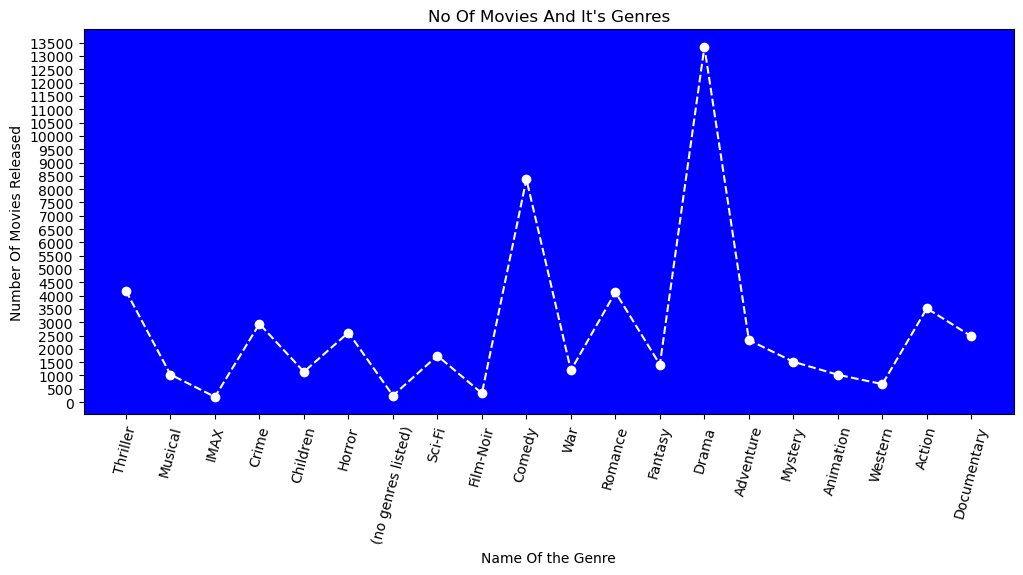

In [111]:
fig,ax=plt.subplots()
plt.plot(GenresFrame['No Of Movies'],'--wo',linewidth=1.5,markersize=6,zorder=2)
plt.title('No Of Movies And It\'s Genres')
plt.ylabel('Number Of Movies Released')
plt.xlabel('Name Of the Genre')
plt.xticks(ticks=range(len(GenresFrame)),labels=GenresFrame.Genre,rotation=75)
plt.yticks(ticks=range(0,14000,500))
plt.grid(axis='y',which='both',linewidth=50,color='blue')
plt.show()

In [112]:
# From the above graph, amoung all the movies, Drama movies released more.
# after Drama movies, comedy movies release more.
# nearly 250 movies are not mapped with any genre.

In [113]:
movies.head()

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [114]:
# now analyze the average rating of each genre.

In [115]:
temp=[]
for i in GenresFrame.Genre.tolist():
    temp.append(movies[movies.genres.str.contains(i)]['rating'].mean())
temp

C:\Users\laasa\AppData\Local\Temp\ipykernel_7520\2243966505.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  temp.append(movies[movies.genres.str.contains(i)]['rating'].mean())


[3.0171852561033985,
 3.1822393822393824,
 3.293877551020408,
 3.166451173868663,
 2.956804214223003,
 2.6978935273841445,
 2.8060975609756094,
 2.8923121055651175,
 3.438484848484848,
 3.0753045139718176,
 3.318592964824121,
 3.2050884419675314,
 3.093484419263456,
 3.2611360911270983,
 3.070888793473594,
 3.1342800528401584,
 3.17682570593963,
 3.073224852071006,
 2.9766193181818186,
 3.434601375961149]

In [116]:
GenresFrame['Avg Rating']=temp

In [117]:
GenresFrame

,Genre,No Of Movies,Avg Rating
0,Thriller,4178,3.017185
1,Musical,1036,3.182239
2,IMAX,196,3.293878
3,Crime,2939,3.166451
4,Children,1139,2.956804
5,Horror,2611,2.697894
6,(no genres listed),246,2.806098
7,Sci-Fi,1743,2.892312
8,Film-Noir,330,3.438485
9,Comedy,8374,3.075305


In [118]:
# bi-variate analysis

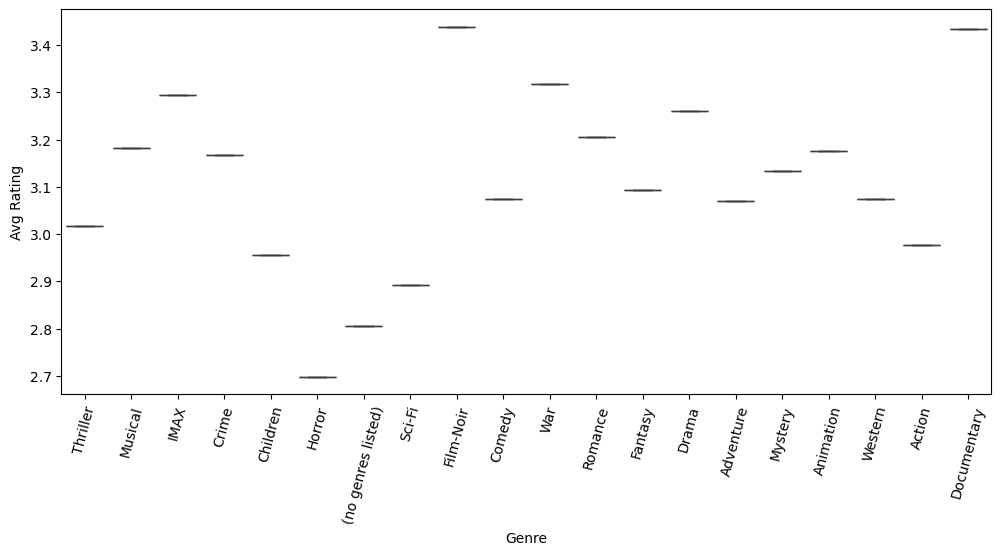

In [119]:
sns.boxplot(data=GenresFrame,x='Genre',y='Avg Rating')
plt.xticks(rotation=75)
plt.show()

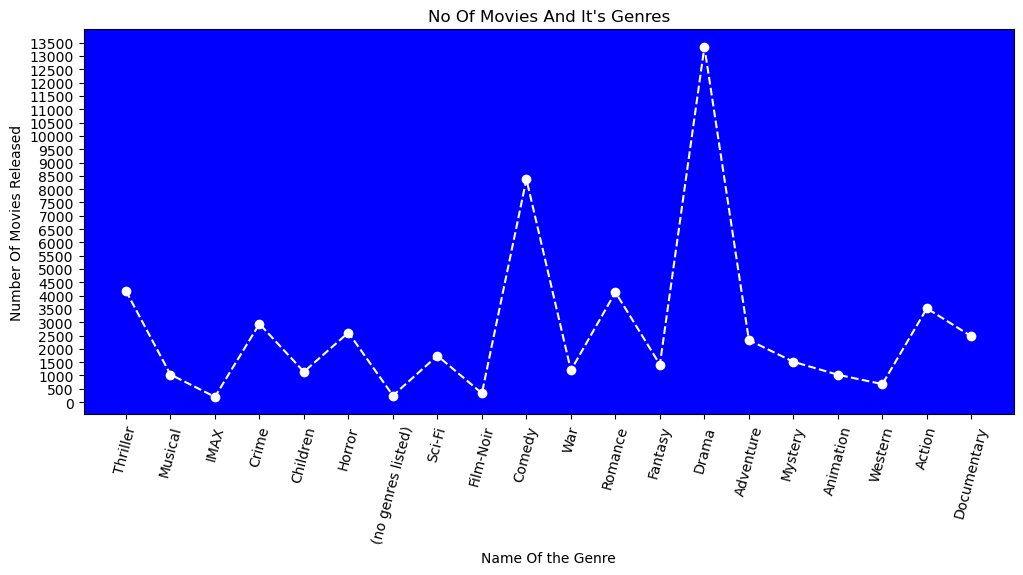

In [120]:
fig

In [121]:
# from the above graphs, there are less Film-Noir and Documentary movies, but it's ratings are high.
# there are less ratings for horror movies.

In [122]:
movies.head()

,movieId,title,Year,rating,genres,(no genres listed),Action,Adventure,Animation,Children,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,tags
0,1,Toy Story,1995,3.9,Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,"[Watched, computer animation, Disney animated ..."
1,2,Jumanji,1995,3.2,Adventure|Children|Fantasy,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,"[time travel, adapted from:book, board game, c..."
2,3,Grumpier Old Men,1995,3.2,Comedy|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[old people that is actually funny, sequel fev..."
3,4,Waiting to Exhale,1995,2.9,Comedy|Drama|Romance,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,"[chick flick, revenge, characters, chick flick..."
4,5,Father of the Bride Part II,1995,3.1,Comedy,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[Diane Keaton, family, sequel, Steve Martin, w..."


In [123]:
movies.Year=movies.Year.str.strip().astype(int)

In [124]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movieId             27278 non-null  int64  
 1   title               27278 non-null  object 
 2   Year                27278 non-null  int32  
 3   rating              27278 non-null  float64
 4   genres              27278 non-null  object 
 5   (no genres listed)  27278 non-null  int64  
 6   Action              27278 non-null  int64  
 7   Adventure           27278 non-null  int64  
 8   Animation           27278 non-null  int64  
 9   Children            27278 non-null  int64  
 10  Comedy              27278 non-null  int64  
 11  Crime               27278 non-null  int64  
 12  Documentary         27278 non-null  int64  
 13  Drama               27278 non-null  int64  
 14  Fantasy             27278 non-null  int64  
 15  Film-Noir           27278 non-null  int64  
 16  Horr

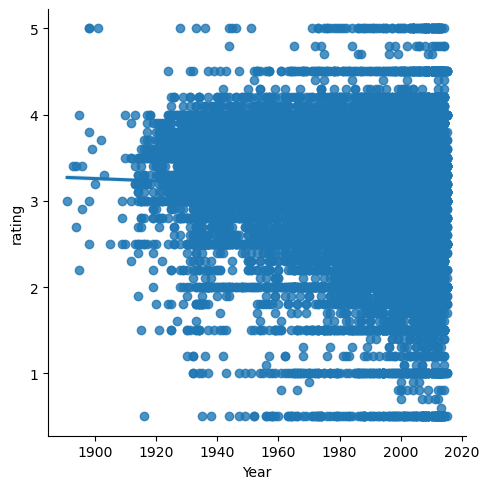

In [125]:
sns.lmplot(data=movies.sort_values(by='Year'),x='Year',y='rating')
plt.show()

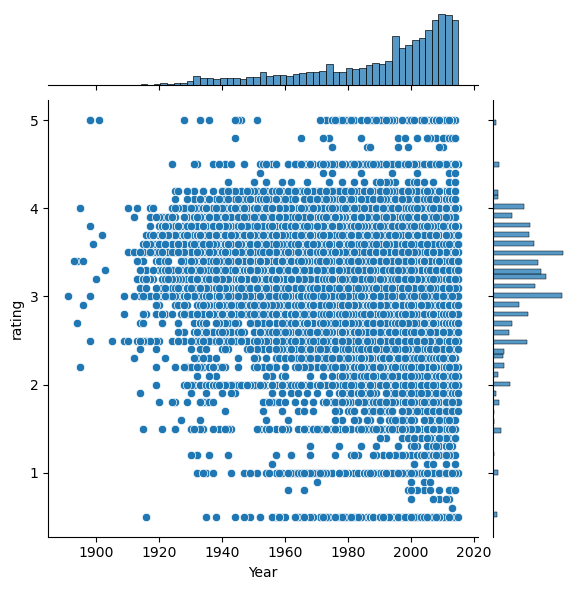

In [126]:
sns.jointplot(data=movies,x='Year',y='rating',kind='scatter')
plt.show()

In [132]:
movies[['Year','rating']].corr()# we have no postive corelations.

,Year,rating
Year,1.000000,-0.049293
rating,-0.049293,1.000000
